A study in game trend in NBA. Analysis has been done with Python Pandas and Scikit-learn.
Connection of game trends with height weight data of players.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_models import *
from nba_hw_analysis import *
import seaborn as sns
%matplotlib notebook
from scipy.stats import pearsonr

In [2]:
from IPython.core.display import display, HTML
from IPython.core.magic import register_cell_magic, register_line_cell_magic, register_line_magic

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'

In [4]:
df = pd.read_csv('data/Seasons_stats.csv')
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
df1 = df[['Year','Player','PTS','3PA','2PA','3P%','2P%','FTA','FT%','Pos']].dropna(axis=0)
df2 = df1.groupby('Year').aggregate('mean').reset_index()

In [6]:
print(df2.columns)

Index(['Year', 'PTS', '3PA', '2PA', '3P%', '2P%', 'FTA', 'FT%'], dtype='object')


<IPython.core.display.Javascript object>


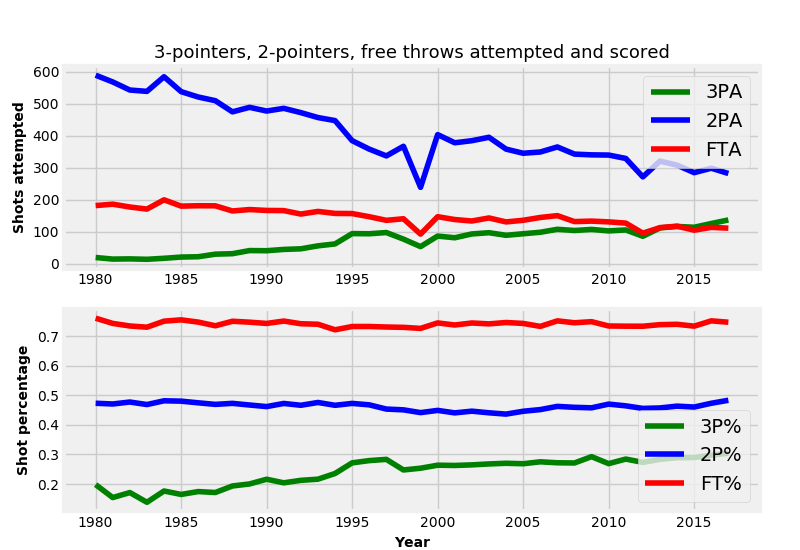

In [7]:
fig, axes = plt.subplots(2, 1, subplot_kw=dict(), figsize=(8,10))
fig.set_figheight(5.5)
axes[0].plot(df2[['Year']],df2[['3PA']],color='g')
axes[0].plot(df2[['Year']],df2[['2PA']],color='b')
axes[0].plot(df2[['Year']],df2[['FTA']],color='r')
axes[0].legend(['3PA', '2PA', 'FTA'], loc='upper right')
axes[1].plot(df2[['Year']],df2[['3P%']],color='g')
axes[1].plot(df2[['Year']],df2[['2P%']],color='b')
axes[1].plot(df2[['Year']],df2[['FT%']],color='r')
axes[1].legend(['3P%', '2P%', 'FT%'], loc='lower right')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('Shots attempted')
axes[1].set_ylabel('Shot percentage')
axes[0].set_title('3-pointers, 2-pointers, free throws attempted and scored')
fig.savefig('shots.png')

In [8]:
pl = pd.read_csv('data/Players.xls')
pldf = df.merge(pl,on='Player')

In [9]:
pldf['hw']=pldf['height']/pldf['weight']
pldfy = pldf[['3P%','Player','2P%','FG%','height','hw','Year','weight','Pos']].dropna(axis=0).groupby('Year').aggregate('mean').reset_index().drop_duplicates()

<IPython.core.display.Javascript object>


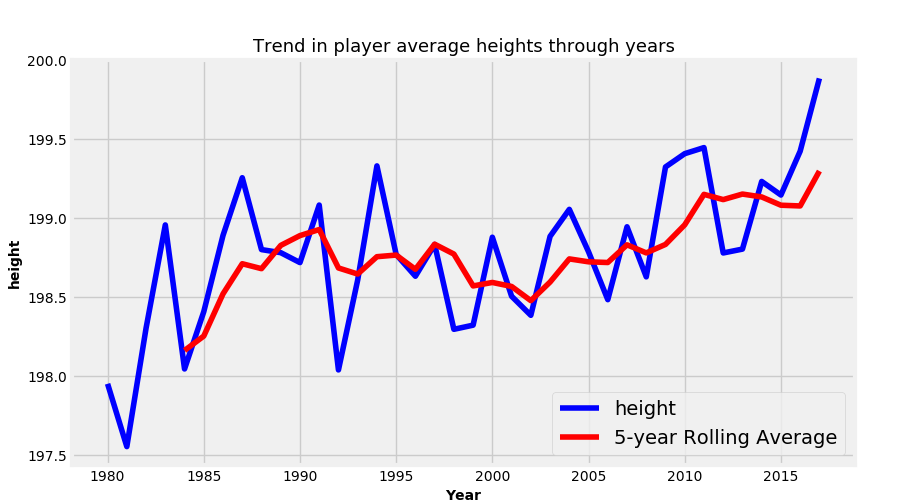

In [10]:
plot_metric(pldfy, 'height', 5, 'height')

<IPython.core.display.Javascript object>


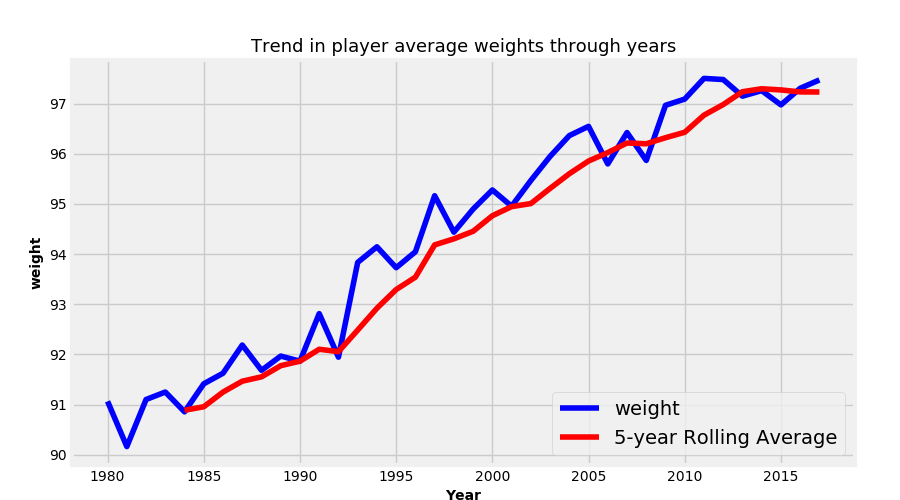

In [11]:
plot_metric(pldfy, 'weight', 5, 'weight')

<IPython.core.display.Javascript object>


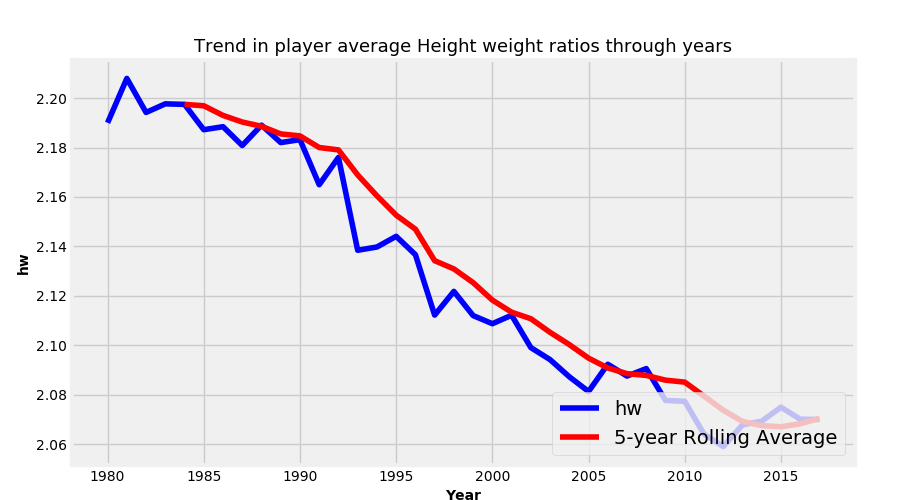

In [12]:
plot_metric(pldfy,'hw',5,'Height weight ratio')

<IPython.core.display.Javascript object>


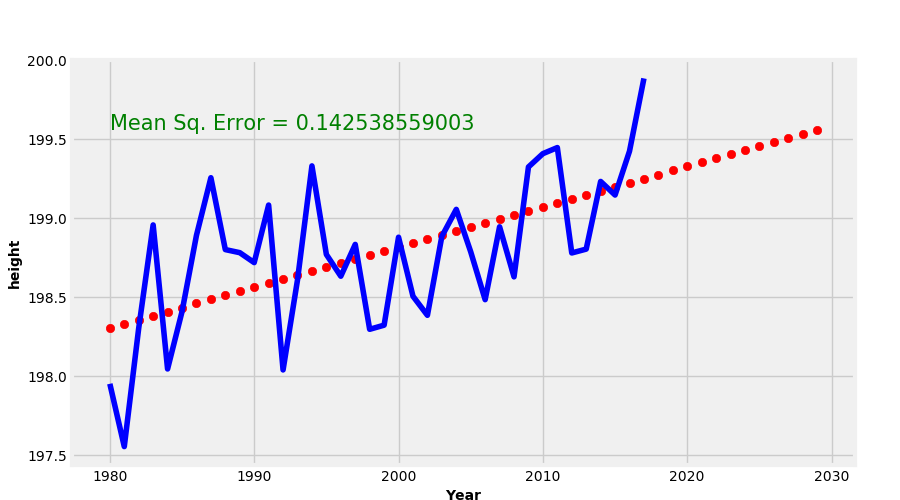

In [13]:
linear_reg(pldfy,'Year','height')

<IPython.core.display.Javascript object>


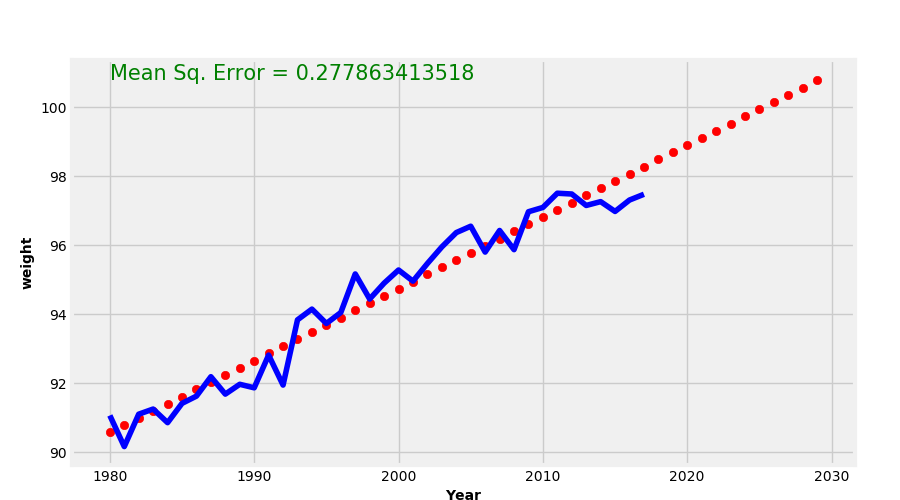

In [14]:
linear_reg(pldfy,'Year','weight')

<IPython.core.display.Javascript object>


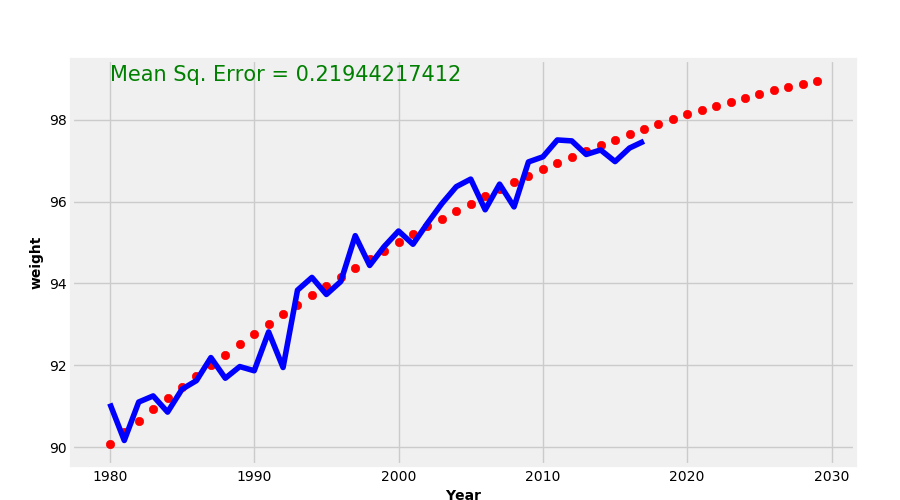

In [15]:
polynomial_fit(pldfy,'Year','weight',2)

<IPython.core.display.Javascript object>


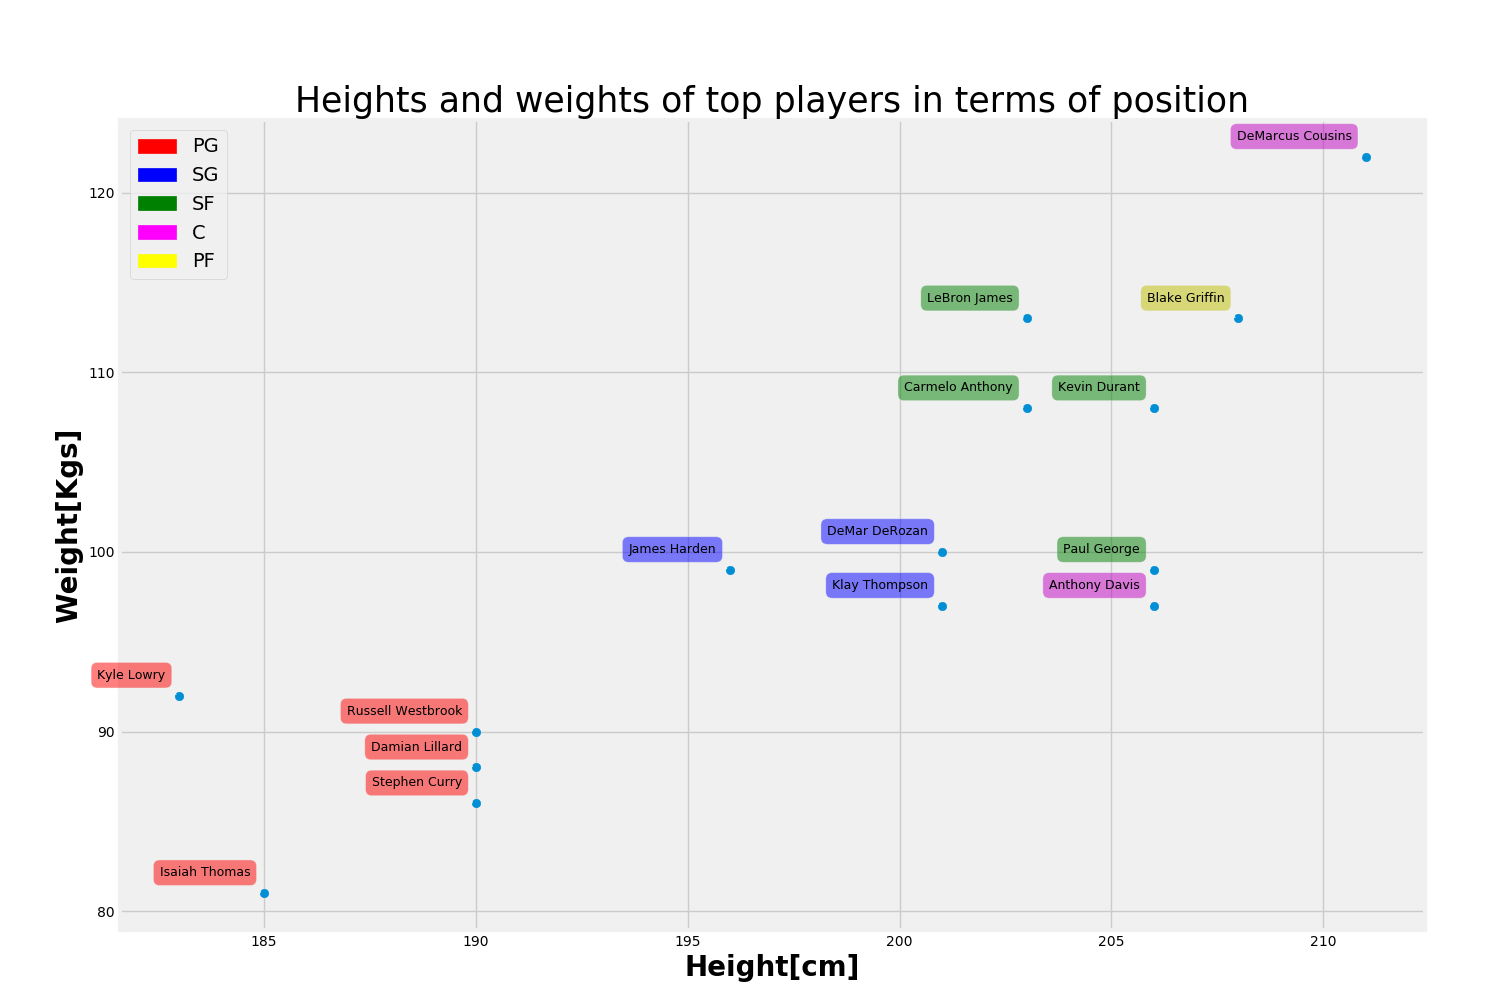

In [16]:
hw_plot(df,pl,2016,15)

<IPython.core.display.Javascript object>


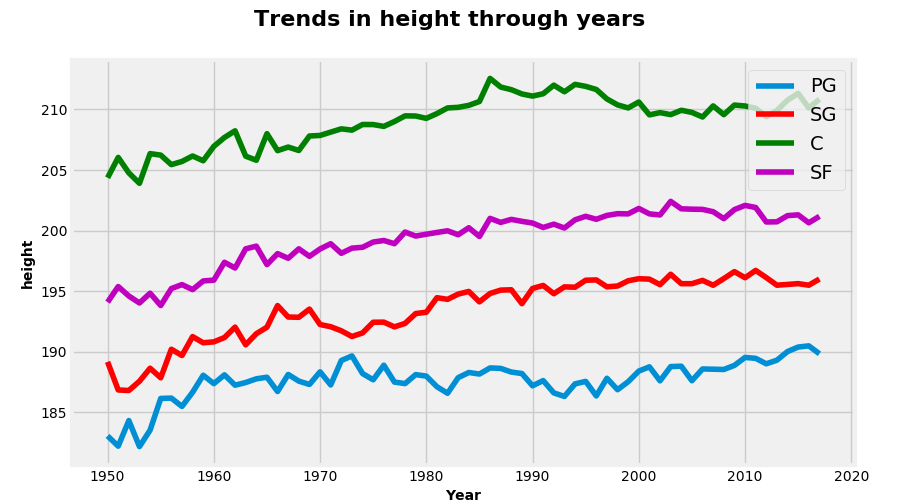

In [17]:
plot_allpos_metric(pldf,'height','height')

<IPython.core.display.Javascript object>


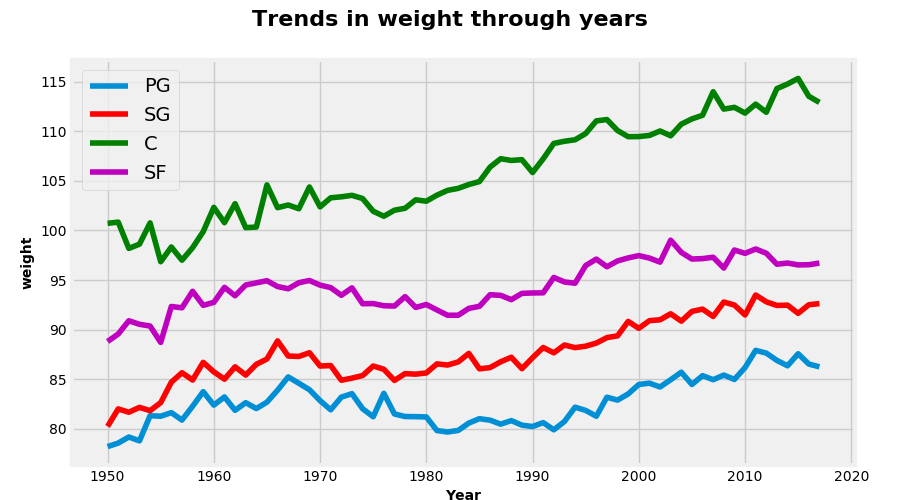

In [18]:
plot_allpos_metric(pldf,'weight','weight')

<IPython.core.display.Javascript object>


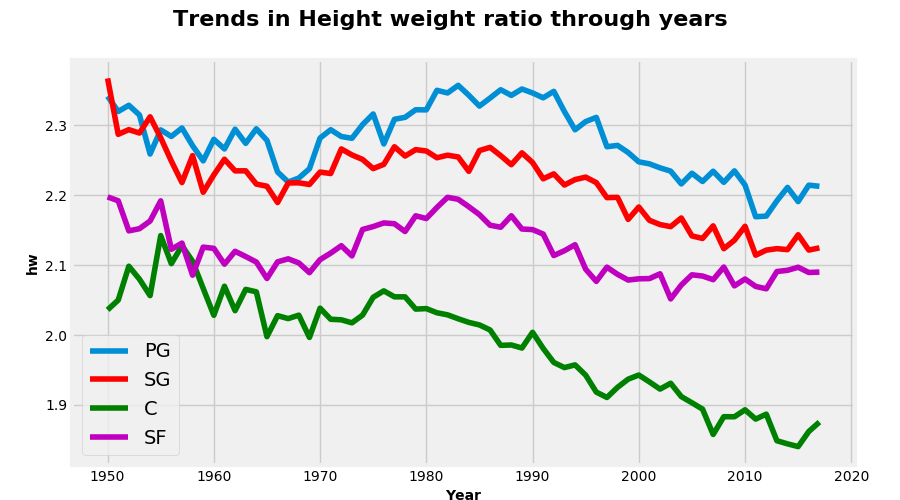

In [19]:
plot_allpos_metric(pldf,'hw','Height weight ratio')

In [20]:
print(pldf[['height','weight','3P%','2P%','FT%','hw']].corr())

          height    weight       3P%       2P%       FT%        hw
height  1.000000  0.821046 -0.210524  0.158146 -0.233026 -0.644015
weight  0.821046  1.000000 -0.182026  0.153462 -0.237490 -0.955293
3P%    -0.210524 -0.182026  1.000000 -0.071275  0.212571  0.128704
2P%     0.158146  0.153462 -0.071275  1.000000  0.063486 -0.126171
FT%    -0.233026 -0.237490  0.212571  0.063486  1.000000  0.200922
hw     -0.644015 -0.955293  0.128704 -0.126171  0.200922  1.000000


In [21]:
f=pldf[pldf.G>30][['height','weight','3P%','2P%','FT%','Age','MP']]

<IPython.core.display.Javascript object>


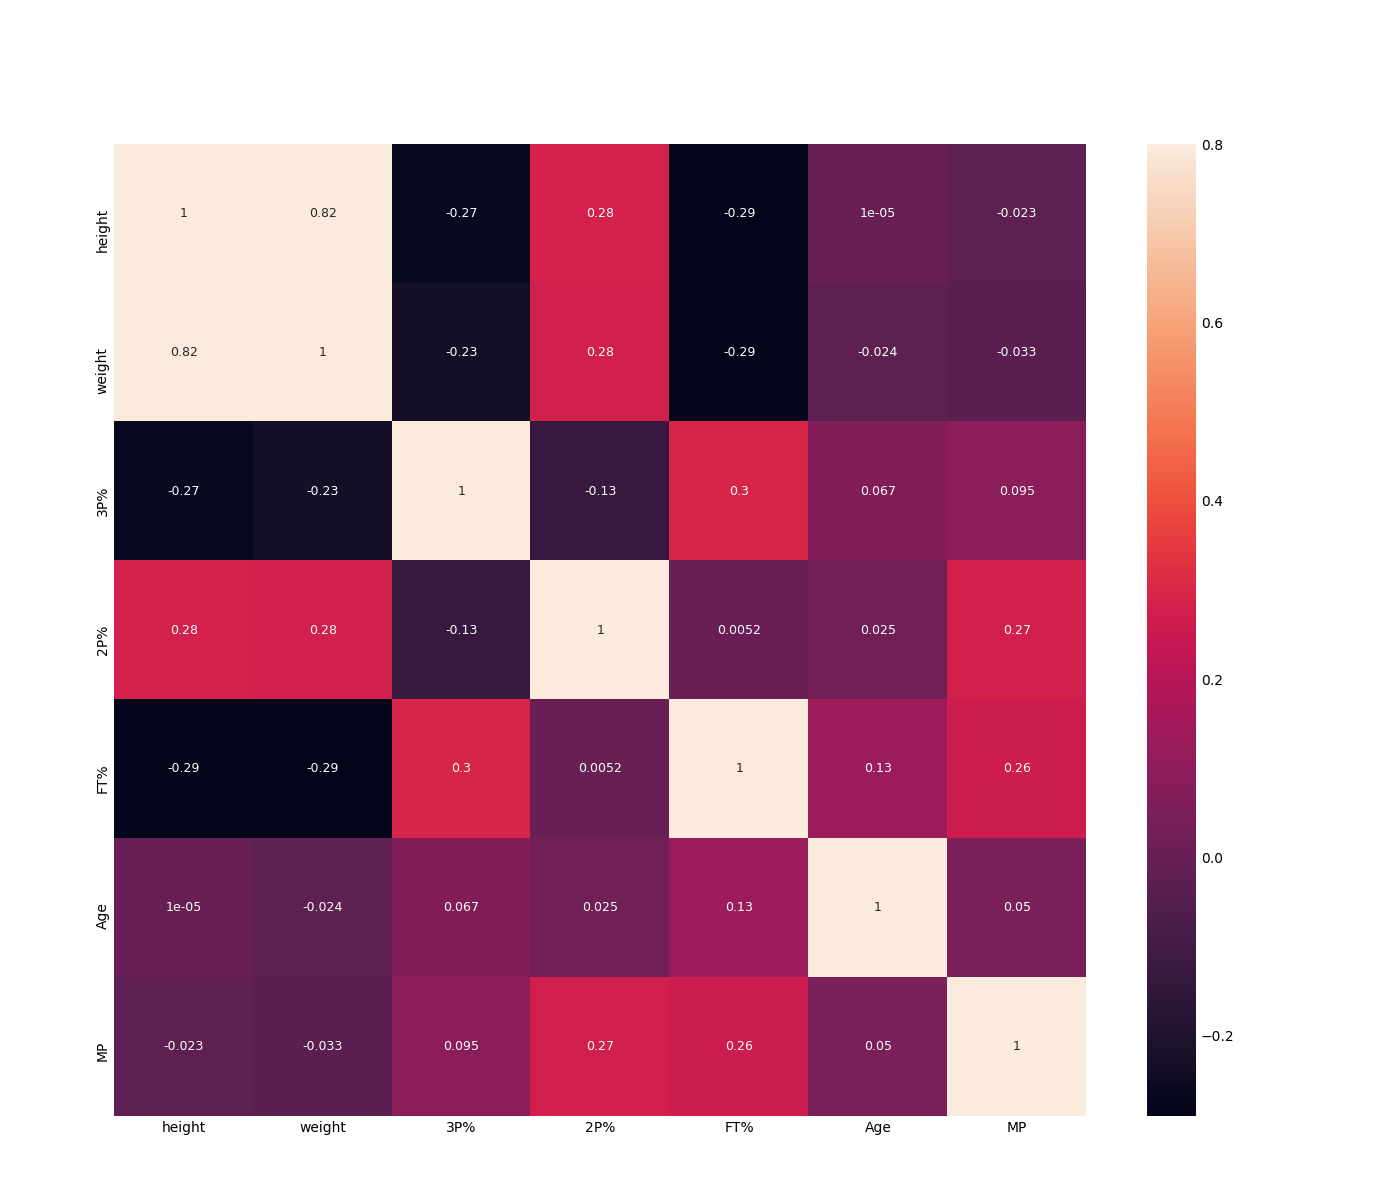

In [22]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(f.corr(), vmax=0.8, square=True, annot=True)
plt.show()

In [23]:
fnn = f.dropna(axis=0)

In [24]:
print('Correlation of free throw percentage with height, weight, age and minutes played')
for col in fnn.columns:
    if col!='FT%' and col!='3P%' and col!='2P%':
        print(col, pearsonr(fnn[col].values,fnn['FT%'].values))
print('Correlation of 3-pointer percentage with height, weight, age and minutes played')
for col in fnn.columns:
    if col!='FT%' and col!='3P%' and col!='2P%':
        print(col, pearsonr(fnn[col].values,fnn['3P%'].values))

Correlation of free throw percentage with height, weight, age and minutes played
height (-0.2708989406111274, 7.3348146389681842e-200)
weight (-0.27019442182008191, 8.5642027092376444e-199)
Age (0.13315408734407269, 2.3287142542801463e-48)
MP (0.23426170289264189, 1.5524912420839464e-148)
Correlation of 3-pointer percentage with height, weight, age and minutes played
height (-0.2655575217043642, 7.5397581765425018e-192)
weight (-0.23349540293230603, 1.4973517074854514e-147)
Age (0.066860425477955551, 2.6129764112377518e-13)
MP (0.09477007863877121, 3.1421599962743605e-25)
